<a href="https://colab.research.google.com/github/JITHIKASAGAR123/FinalYearProject/blob/main/c_K_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
#Importing the standard libraries for data manipulation and analysis
import numpy as np    
import pandas as pd
#Importing the plotting and visualization library for the mathematical and numerical analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline      
#%matplotlib inline sets the backend of matplotlib to the inline backend that displays outputs of plotting commands.
import io
import warnings
warnings.filterwarnings("ignore")   #To ignore any warning

In [276]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kidney_disease.csv to kidney_disease (3).csv
User uploaded file "kidney_disease.csv" with length 48551 bytes


In [277]:
import io
df = pd.read_csv(io.BytesIO(uploaded['kidney_disease.csv'])) #reading data

In [278]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [279]:
df.info() #It returns a concise summary of a dataframe,including index dtypeand column dtypes,non null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [280]:

pd.set_option('display.max_rows', 400)
display(df)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.20,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.80,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.80,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.80,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.40,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.10,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.00,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.10,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.90,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.20,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [281]:
df.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [282]:
df.classification=df.classification.replace("ckd\t","ckd")

In [283]:
df.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [284]:
def plotvariable(df,variable):
  plt.figure(figsize=(16,4))
  #histogram
  plt.subplot(1,2,1)
  plt.hist(df[variable], alpha=0.5)
  #boxplot
  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.show()

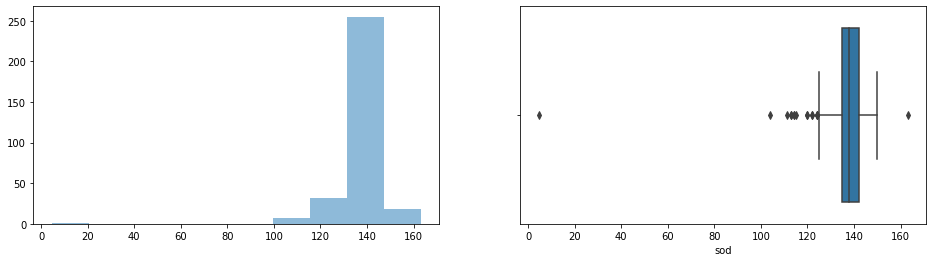

In [285]:
plotvariable(df,'sod')

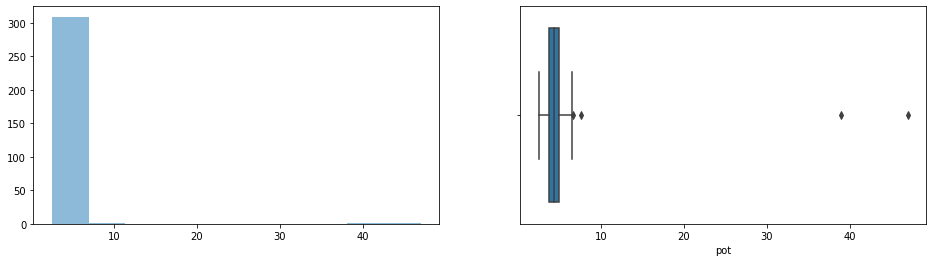

In [286]:
plotvariable(df,'pot')

In [287]:
def find_boundaries(df, variable):
  Q1=df[variable].quantile(.25)
  Q3=df[variable].quantile(.75)
  IQR=Q3-Q1
  lower_boundary=Q1-1.5*IQR
  upper_boundary=Q3+1.5*IQR
  return lower_boundary, upper_boundary

In [288]:
lower_sod,upper_sod=find_boundaries(df,'sod')
print("upper limit of sod", upper_sod)
print("lower limit of sod", lower_sod)

upper limit of sod 152.5
lower limit of sod 124.5


In [289]:
outlier_sod=np.where(df['sod']>upper_sod,True,
                     np.where(df['sod']<lower_sod,True,False))

In [290]:
outlier_sod

array([False, False, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [291]:
df.shape

(400, 26)

In [292]:
engineered_data= df.loc[~(outlier_sod),]

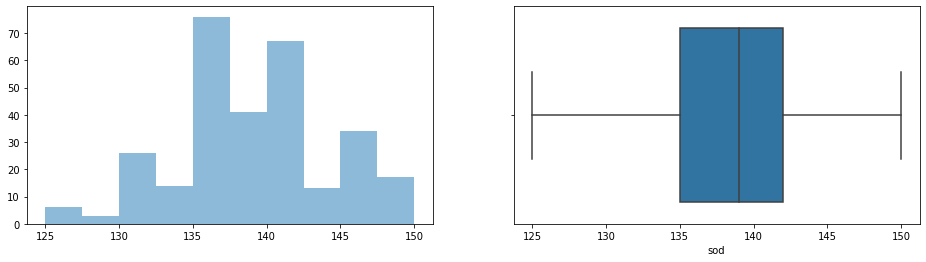

In [293]:
plotvariable(engineered_data,'sod')

In [294]:
lower_pot,upper_pot=find_boundaries(df,'pot')
print("upper limit of pot", upper_pot)
print("lower limit of pot", lower_pot)

upper limit of pot 6.550000000000001
lower limit of pot 2.149999999999999


In [295]:
outlier_pot=np.where(df['pot']>upper_pot,True,
                     np.where(df['pot']<lower_pot,True,False))

In [296]:
outlier_pot

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [297]:
engineered_data= df.loc[~(outlier_pot),]

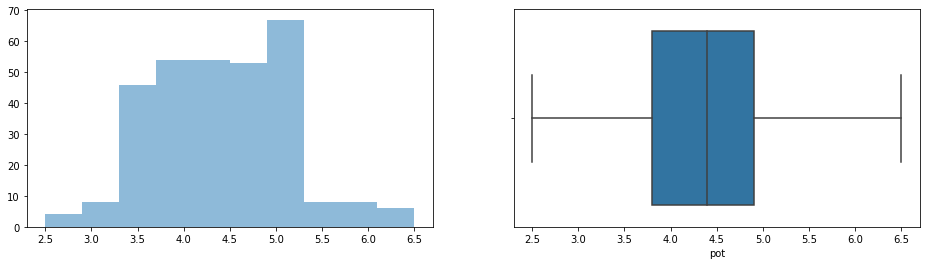

In [298]:
plotvariable(engineered_data,'pot')

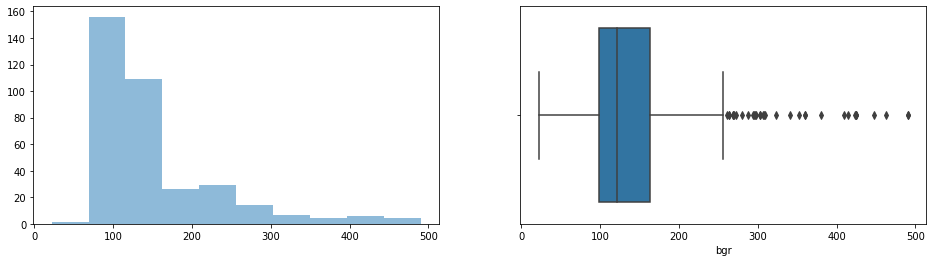

In [299]:
plotvariable(df,'bgr')

In [300]:
lower_bgr,upper_bgr=find_boundaries(df,'bgr')
print("upper limit of bgr", upper_bgr)
print("lower limit of bgr", lower_bgr)

upper limit of bgr 259.0
lower limit of bgr 3.0


In [301]:
df['bgr']=np.where(df['bgr']>upper_bgr,upper_bgr,
                     np.where(df['bgr']<lower_bgr,lower_bgr,df['bgr']))

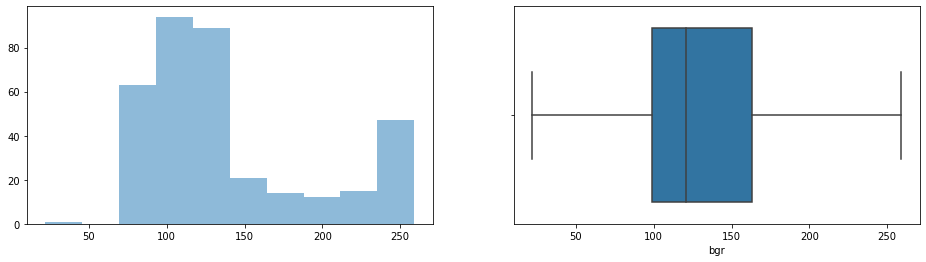

In [302]:
plotvariable(df,'bgr')

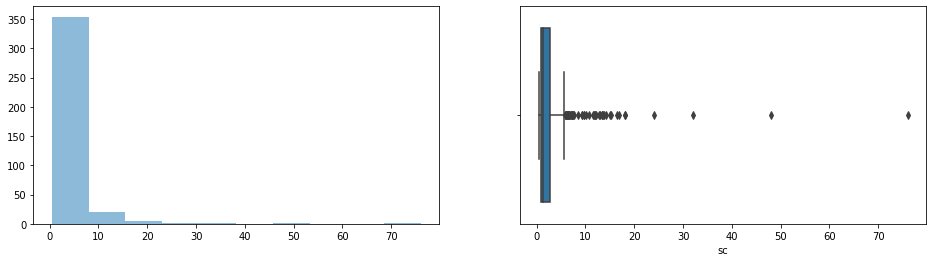

In [303]:
plotvariable(df,'sc')

In [304]:
lower_sc,upper_sc=find_boundaries(df,'sc')
print("upper limit of sc", upper_sc)
print("lower limit of sc", lower_sc)

upper limit of sc 5.6499999999999995
lower limit of sc -1.9499999999999997


In [305]:
outlier_sc=np.where(df['sc']>upper_sc,True,
                     np.where(df['sc']<lower_sc,True,False))

In [306]:
engineered_data= df.loc[~(outlier_sc),]

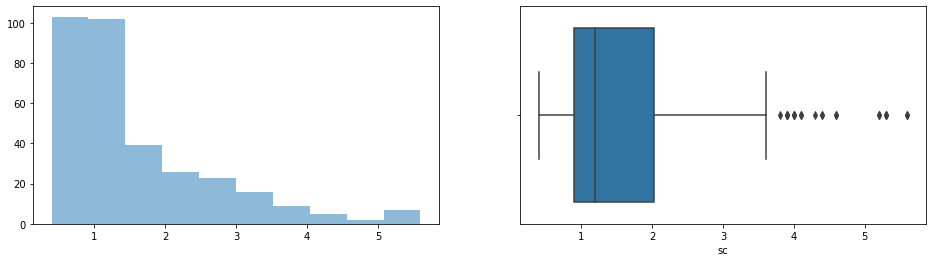

In [307]:
plotvariable(engineered_data,'sc')

In [308]:
df['sc']=np.where(df['sc']>upper_sc,upper_sc,
                     np.where(df['sc']<lower_sc,lower_sc,df['sc']))

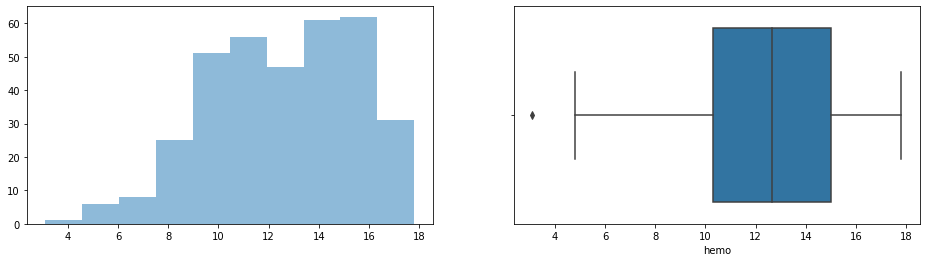

In [309]:
plotvariable(df,'hemo')

In [310]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,259.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [311]:
missing_cat=[var for var in df.columns if df[var].isnull().mean()>0 and df[var].dtype=='O']
missing_cat

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [312]:
df['rbc'].isnull().sum()

152

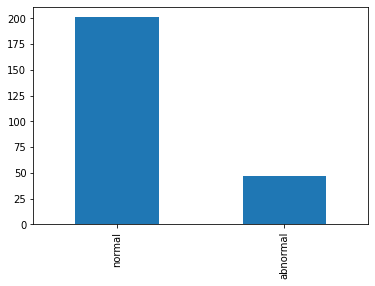

In [313]:
df['rbc'].value_counts().plot.bar()

In [314]:
df['rbc'].fillna('normal',inplace=True)

In [315]:
df['rbc'].isnull().sum()

0

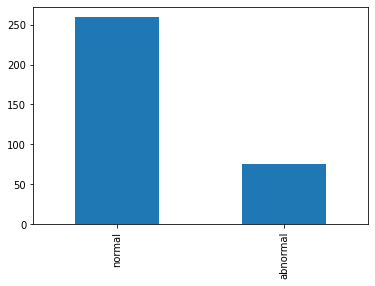

In [316]:
df['pc'].value_counts().plot.bar()

In [317]:
df['pc'].fillna('normal',inplace=True)
df['pc'].isnull().sum()


0

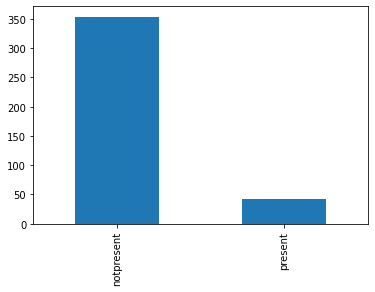

In [318]:
df['pcc'].value_counts().plot.bar()

In [319]:
df['pcc'].fillna('notpresent',inplace=True)
df['pcc'].isnull().sum()

0

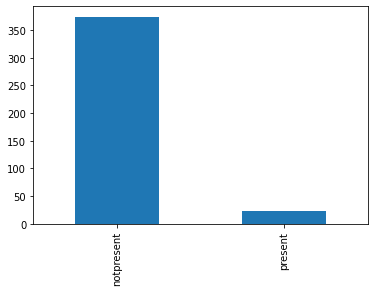

In [320]:
df['ba'].value_counts().plot.bar()

In [321]:
df['ba'].fillna('notpresent',inplace=True)
df['pcc'].isnull().sum()

0

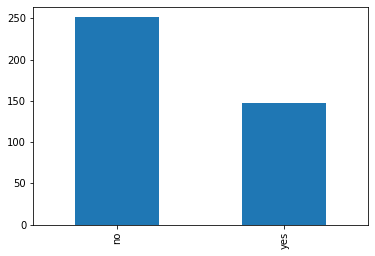

In [322]:
df['htn'].value_counts().plot.bar()

In [323]:
df['htn'].fillna('no',inplace=True)
df['htn'].isnull().sum()

0

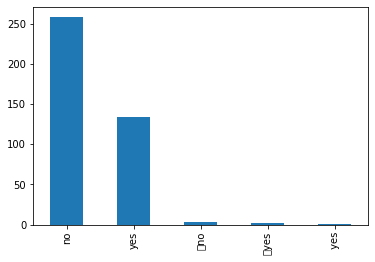

In [324]:
df['dm'].value_counts().plot.bar()

In [325]:
df.dm.unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [326]:
df.dm=df.dm.replace("\tno","no")
df.dm=df.dm.replace("\tyes","yes")

df.dm=df.dm.replace(" yes","yes")
df.dm.unique()

array(['yes', 'no', nan], dtype=object)

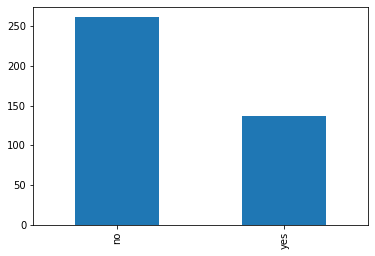

In [327]:
df['dm'].value_counts().plot.bar()

In [328]:
df['dm'].fillna('no',inplace=True)

In [329]:
df['dm'].isnull().sum()

0

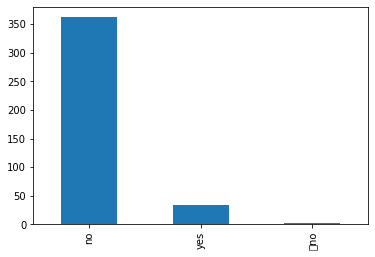

In [330]:
df['cad'].value_counts().plot.bar()

In [331]:
df.cad.unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [332]:
df.cad=df.cad.replace("\tno","no")

In [333]:
df['cad'].isnull().sum()

2

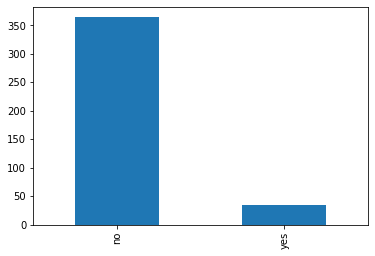

In [334]:
df['cad'].value_counts().plot.bar()

In [335]:
df['cad'].fillna('no',inplace=True)
df['cad'].isnull().sum()


0

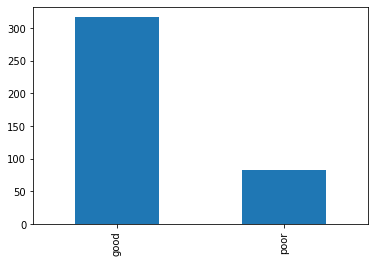

In [336]:
df['appet'].value_counts().plot.bar()

In [337]:
df['appet'].fillna('good',inplace=True)
df['appet'].isnull().sum()

0

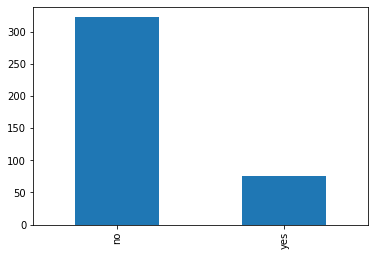

In [338]:
df['pe'].value_counts().plot.bar()

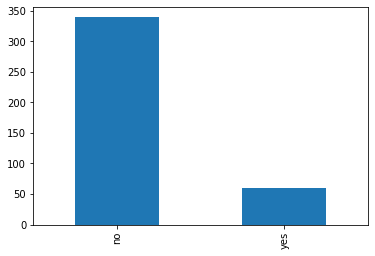

In [339]:
df['pe'].fillna('no',inplace=True)
df['ane'].value_counts().plot.bar()

In [340]:
df['ane'].fillna('no',inplace=True)
df['ane'].isnull().sum()

0

In [341]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc                 0
pc                  0
pcc                 0
ba                  0
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [342]:
df_dummy=df.copy()
df_dummy=pd.get_dummies(df_dummy,drop_first=True)
df_dummy

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc_normal,pc_normal,pcc_present,ba_present,pcv_\t?,pcv_14,pcv_15,pcv_16,pcv_17,pcv_18,pcv_19,pcv_20,pcv_21,pcv_22,pcv_23,pcv_24,pcv_25,pcv_26,pcv_27,pcv_28,pcv_29,pcv_30,pcv_31,pcv_32,pcv_33,pcv_34,pcv_35,pcv_36,...,rc_3.6,rc_3.7,rc_3.8,rc_3.9,rc_4,rc_4.0,rc_4.1,rc_4.2,rc_4.3,rc_4.4,rc_4.5,rc_4.6,rc_4.7,rc_4.8,rc_4.9,rc_5,rc_5.0,rc_5.1,rc_5.2,rc_5.3,rc_5.4,rc_5.5,rc_5.6,rc_5.7,rc_5.8,rc_5.9,rc_6.0,rc_6.1,rc_6.2,rc_6.3,rc_6.4,rc_6.5,rc_8.0,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.20,NaN,NaN,15.4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.80,NaN,NaN,11.3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,259.0,53.0,1.80,NaN,NaN,9.6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.80,111.0,2.5,11.2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.40,NaN,NaN,11.6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,1.10,142.0,3.2,12.2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
6,6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,5.65,104.0,4.0,12.4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7,24.0,NaN,1.015,2.0,4.0,259.0,31.0,1.10,NaN,NaN,12.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
8,8,52.0,100.0,1.015,3.0,0.0,138.0,60.0,1.90,NaN,NaN,10.8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
9,9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,5.65,114.0,3.7,9.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0


In [343]:
df_knnimputer=df_dummy.copy()

In [344]:
df_miceimputer=df_dummy.copy()

In [345]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [346]:
mice=IterativeImputer(random_state=162)

In [347]:
df_miceimputer.iloc[:,:]=mice.fit_transform(df_miceimputer)

In [348]:
df_miceimputer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 205 entries, id to classification_notckd
dtypes: float64(205)
memory usage: 640.8 KB


In [349]:
df_miceimputer.isnull().sum()

id                       0
age                      0
bp                       0
sg                       0
al                       0
su                       0
bgr                      0
bu                       0
sc                       0
sod                      0
pot                      0
hemo                     0
rbc_normal               0
pc_normal                0
pcc_present              0
ba_present               0
pcv_\t?                  0
pcv_14                   0
pcv_15                   0
pcv_16                   0
pcv_17                   0
pcv_18                   0
pcv_19                   0
pcv_20                   0
pcv_21                   0
pcv_22                   0
pcv_23                   0
pcv_24                   0
pcv_25                   0
pcv_26                   0
pcv_27                   0
pcv_28                   0
pcv_29                   0
pcv_30                   0
pcv_31                   0
pcv_32                   0
pcv_33                   0
p

In [350]:
df_miceimputer.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc_normal,pc_normal,pcc_present,ba_present,pcv_\t?,pcv_14,pcv_15,pcv_16,pcv_17,pcv_18,pcv_19,pcv_20,pcv_21,pcv_22,pcv_23,pcv_24,pcv_25,pcv_26,pcv_27,pcv_28,pcv_29,pcv_30,pcv_31,pcv_32,pcv_33,pcv_34,pcv_35,pcv_36,...,rc_3.6,rc_3.7,rc_3.8,rc_3.9,rc_4,rc_4.0,rc_4.1,rc_4.2,rc_4.3,rc_4.4,rc_4.5,rc_4.6,rc_4.7,rc_4.8,rc_4.9,rc_5,rc_5.0,rc_5.1,rc_5.2,rc_5.3,rc_5.4,rc_5.5,rc_5.6,rc_5.7,rc_5.8,rc_5.9,rc_6.0,rc_6.1,rc_6.2,rc_6.3,rc_6.4,rc_6.5,rc_8.0,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,135.349111,3.813870,15.4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,7.0,50.0,1.020,4.0,0.0,109.926946,18.0,0.8,133.193446,3.252685,11.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,62.0,80.0,1.010,2.0,3.0,259.000000,53.0,1.8,128.985657,4.234905,9.6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,136.171499,3.522118,11.6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [351]:
pd.set_option('display.max_rows', 400)
display(df_miceimputer)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc_normal,pc_normal,pcc_present,ba_present,pcv_\t?,pcv_14,pcv_15,pcv_16,pcv_17,pcv_18,pcv_19,pcv_20,pcv_21,pcv_22,pcv_23,pcv_24,pcv_25,pcv_26,pcv_27,pcv_28,pcv_29,pcv_30,pcv_31,pcv_32,pcv_33,pcv_34,pcv_35,pcv_36,...,rc_3.6,rc_3.7,rc_3.8,rc_3.9,rc_4,rc_4.0,rc_4.1,rc_4.2,rc_4.3,rc_4.4,rc_4.5,rc_4.6,rc_4.7,rc_4.8,rc_4.9,rc_5,rc_5.0,rc_5.1,rc_5.2,rc_5.3,rc_5.4,rc_5.5,rc_5.6,rc_5.7,rc_5.8,rc_5.9,rc_6.0,rc_6.1,rc_6.2,rc_6.3,rc_6.4,rc_6.5,rc_8.0,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
0,0.0,48.000000,80.000000,1.020000,1.000000,0.000000,121.000000,36.000000,1.200000,135.349111,3.813870,15.400000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,7.000000,50.000000,1.020000,4.000000,0.000000,109.926946,18.000000,0.800000,133.193446,3.252685,11.300000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,62.000000,80.000000,1.010000,2.000000,3.000000,259.000000,53.000000,1.800000,128.985657,4.234905,9.600000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.0,48.000000,70.000000,1.005000,4.000000,0.000000,117.000000,56.000000,3.800000,111.000000,2.500000,11.200000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,4.0,51.000000,80.000000,1.010000,2.000000,0.000000,106.000000,26.000000,1.400000,136.171499,3.522118,11.600000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.0,60.000000,90.000000,1.015000,3.000000,0.000000,74.000000,25.000000,1.100000,142.000000,3.200000,12.200000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
6,6.0,68.000000,70.000000,1.010000,0.000000,0.000000,100.000000,54.000000,5.650000,104.000000,4.000000,12.400000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7.0,24.000000,81.883210,1.015000,2.000000,4.000000,259.000000,31.000000,1.100000,128.937222,3.827449,12.400000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,8.0,52.000000,100.000000,1.015000,3.000000,0.000000,138.000000,60.000000,1.900000,133.880613,4.261900,10.800000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [352]:
print("max value",df_miceimputer['bp'].max())
print("min value",df_miceimputer['bp'].min())

max value 180.0
min value 50.0


# **Feature Extraction**

In [353]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_miceimputer.iloc[:,0:25]  
y = df_miceimputer.iloc[:,-1]

In [354]:
X.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc_normal,pc_normal,pcc_present,ba_present,pcv_\t?,pcv_14,pcv_15,pcv_16,pcv_17,pcv_18,pcv_19,pcv_20,pcv_21
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,135.349111,3.813870,15.4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,7.0,50.0,1.020,4.0,0.0,109.926946,18.0,0.8,133.193446,3.252685,11.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,62.0,80.0,1.010,2.0,3.0,259.000000,53.0,1.8,128.985657,4.234905,9.6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,136.171499,3.522118,11.6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [355]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: classification_notckd, dtype: float64

# **Splitting the dataset**

In [356]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((280, 25), (120, 25))

In [357]:
X_train.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc_normal,pc_normal,pcc_present,ba_present,pcv_\t?,pcv_14,pcv_15,pcv_16,pcv_17,pcv_18,pcv_19,pcv_20,pcv_21
id,1.000000,-0.209130,-0.236103,0.628841,-0.527360,-0.251062,-0.349041,-0.300787,-0.455793,0.488476,-0.059195,0.617018,0.245900,0.335150,-0.247136,-0.112955,-0.071353,-0.067671,-0.004548,NaN,NaN,-0.054520,0.022805,0.004394,-0.000340
age,-0.209130,1.000000,0.156446,-0.237724,0.170503,0.249432,0.314676,0.202899,0.292565,-0.080819,0.064315,-0.228876,-0.054389,-0.133876,0.159966,0.106468,0.053710,0.003813,-0.065180,NaN,NaN,-0.004037,-0.010830,0.026535,0.043519
bp,-0.236103,0.156446,1.000000,-0.196240,0.136573,0.254393,0.235426,0.155444,0.248393,-0.107103,0.068803,-0.262626,-0.118234,-0.166420,0.061715,0.086312,-0.026204,0.102813,0.059808,NaN,NaN,0.274837,0.102813,0.102813,-0.026204
sg,0.628841,-0.237724,-0.196240,1.000000,-0.437266,-0.279360,-0.375559,-0.287218,-0.440506,0.412687,-0.054394,0.584496,0.122194,0.318562,-0.305878,-0.171587,0.029861,-0.025328,0.085050,NaN,NaN,-0.051667,-0.017771,-0.025328,-0.035540
al,-0.527360,0.170503,0.136573,-0.437266,1.000000,0.263786,0.379283,0.392860,0.563785,-0.444445,0.123407,-0.553094,-0.286804,-0.493820,0.379120,0.288522,0.045637,0.045637,-0.001516,NaN,NaN,0.017403,0.014986,0.139944,0.053012
su,-0.251062,0.249432,0.254393,-0.279360,0.263786,1.000000,0.713666,0.153325,0.207602,-0.207290,0.204776,-0.197167,-0.068225,-0.177252,0.136560,0.085237,-0.026097,-0.026097,-0.026097,NaN,NaN,-0.012346,-0.024653,0.090250,-0.025809
bgr,-0.349041,0.314676,0.235426,-0.375559,0.379283,0.713666,1.000000,0.163643,0.272442,-0.341742,0.115967,-0.326115,-0.175322,-0.315460,0.262129,0.139517,0.010428,-0.012063,0.033699,NaN,NaN,-0.042051,-0.039909,0.122883,-0.029199
bu,-0.300787,0.202899,0.155444,-0.287218,0.392860,0.153325,0.163643,1.000000,0.761839,-0.233114,0.465449,-0.562247,-0.162471,-0.351747,0.220343,0.148982,-0.000497,0.066707,0.216623,NaN,NaN,0.065414,0.030520,0.099016,0.049906
sc,-0.455793,0.292565,0.248393,-0.440506,0.563785,0.207602,0.272442,0.761839,1.000000,-0.387473,0.256216,-0.684268,-0.234974,-0.352808,0.238786,0.251965,-0.016160,0.134948,0.134948,NaN,NaN,0.134948,0.121889,0.134948,0.134948
sod,0.488476,-0.080819,-0.107103,0.412687,-0.444445,-0.207290,-0.341742,-0.233114,-0.387473,1.000000,0.116968,0.468460,0.196305,0.313167,-0.329575,-0.148316,-0.066235,-0.056342,-0.244299,NaN,NaN,-0.026665,-0.026665,-0.026665,-0.006880


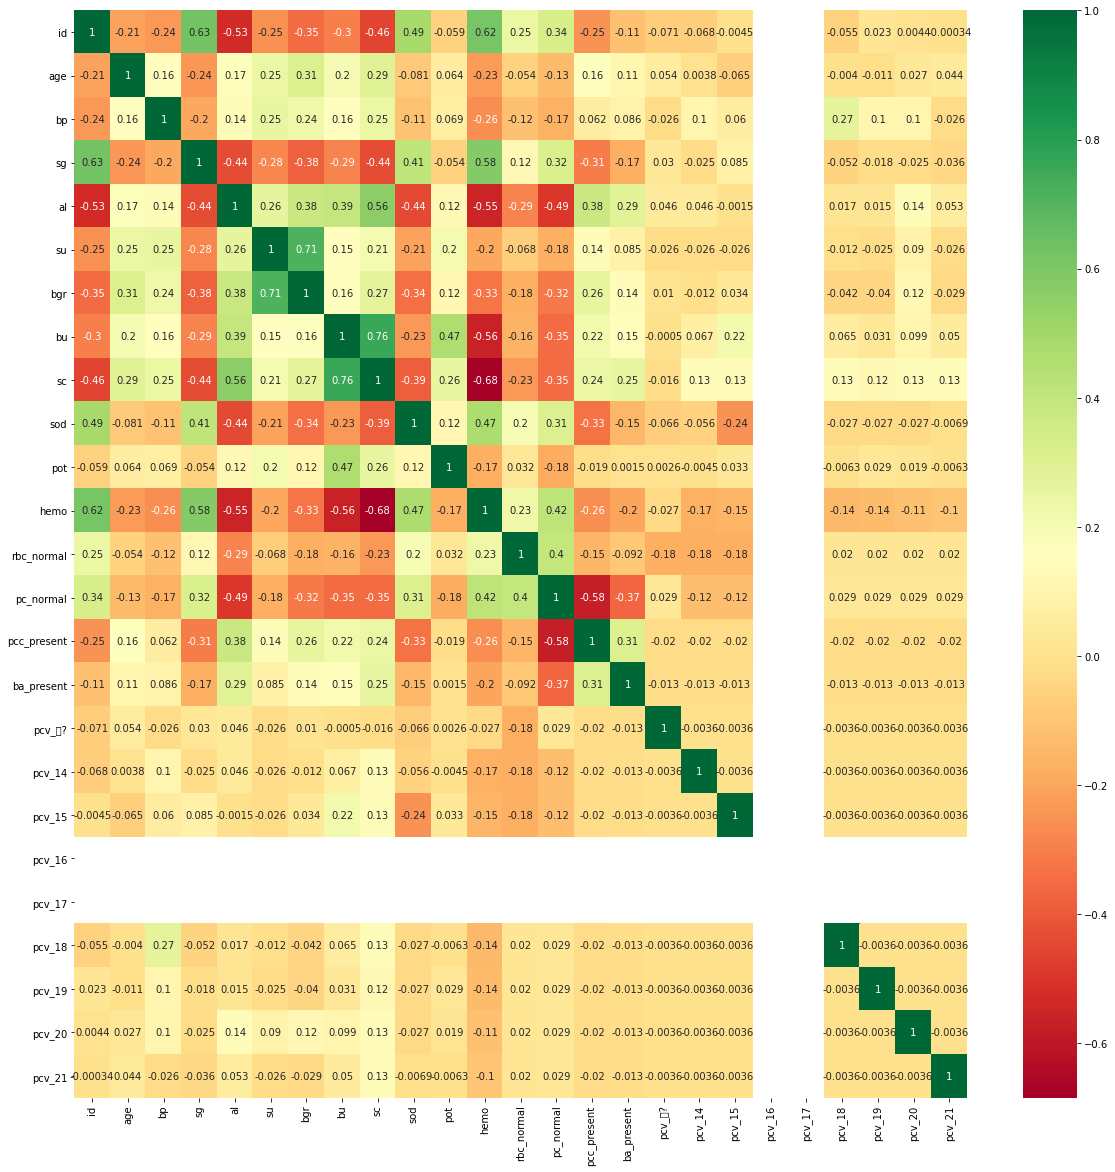

In [358]:
plt.figure(figsize=(20,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()

In [359]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [360]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

2

In [361]:
corr_features

{'bgr', 'sc'}

In [362]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [363]:
print(model.feature_importances_)

[2.53892507e-01 1.02694915e-02 1.68525987e-02 1.77589349e-01
 1.28235479e-01 2.41844833e-02 3.63764141e-02 1.97074059e-02
 9.58182721e-02 1.77789136e-02 6.40546118e-03 1.44569150e-01
 2.21239687e-02 3.81697486e-02 6.40308950e-03 1.37535696e-03
 4.88504164e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.51645795e-05 0.00000000e+00 1.39359007e-04 0.00000000e+00
 2.49379300e-05]


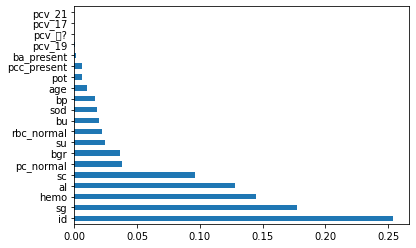

In [364]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# **LOGISTIC REGRESSION**

In [365]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [366]:
y_pred = model.predict(X_test)

In [367]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.accuracy_score(y_train,model.predict(X_train)))

MAE: 0.008333333333333333
R2 score: 0.9652777777777778
0.9916666666666667
1.0


In [368]:

## function to get confusion matrix in a proper format
def draw_cm(actual, predicted ):
  cm = confusion_matrix(actual, predicted)
  sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
  plt.ylabel('Observed')
  plt.xlabel('Predicted')
  plt.show()

[[72  0]
 [ 1 47]]


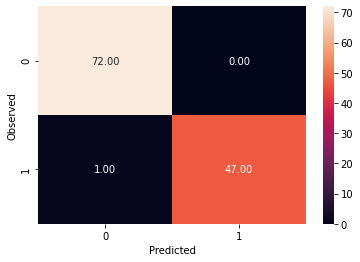

None


In [369]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(draw_cm(y_test,y_pred))

In [370]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        72
         1.0       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



# **Random Forest**

In [371]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(random_state=0,n_estimators= 500,max_depth=8) 
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [372]:
y_pred = clf.predict(X_test)

In [373]:

print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.0
R2 score: 1.0
Accuracy score for test data 1.0


In [374]:

print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(X_train)))

Accuracy score for train data 1.0


[[72  0]
 [ 0 48]]


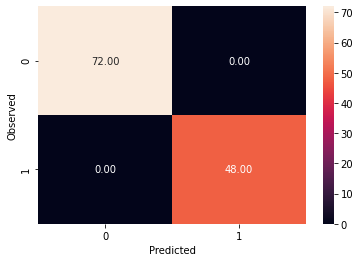

None


In [375]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(draw_cm(y_test,y_pred))

In [376]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        72
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# **KNN**

In [377]:

from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=3) 
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [378]:

y_pred = neigh.predict(X_test)

In [379]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(X_train)))

MAE: 0.008333333333333333
R2 score: 0.9652777777777778
Accuracy score for test data 0.9916666666666667
Accuracy score for train data 1.0


[[71  1]
 [ 0 48]]


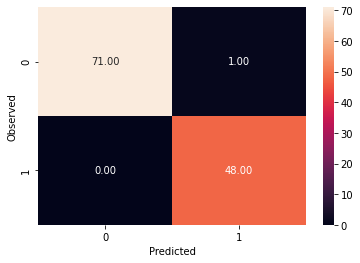

None


In [380]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(draw_cm(y_test,y_pred))

In [381]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        72
         1.0       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



# **Naive Baeyes**

In [382]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [383]:
y_pred = model.predict(X_test)

In [384]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(X_train)))

MAE: 0.058333333333333334
R2 score: 0.7569444444444444
Accuracy score for test data 0.9416666666666667
Accuracy score for train data 0.9178571428571428


[[66  6]
 [ 1 47]]


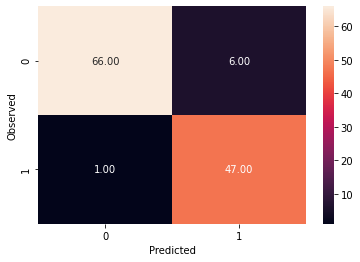

None


In [385]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(draw_cm(y_test,y_pred))

In [386]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95        72
         1.0       0.89      0.98      0.93        48

    accuracy                           0.94       120
   macro avg       0.94      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120



# **Neural Network**

In [387]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500) 

In [388]:
y_pred = model.predict(X_test)

In [389]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(X_train)))

MAE: 0.058333333333333334
R2 score: 0.7569444444444444
Accuracy score for test data 0.9416666666666667
Accuracy score for train data 0.9178571428571428


[[66  6]
 [ 1 47]]


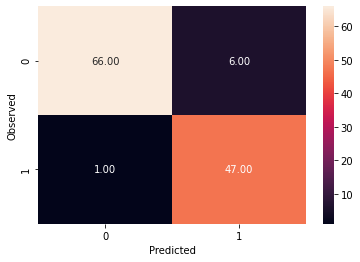

None


In [390]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(draw_cm(y_test,y_pred))

In [391]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95        72
         1.0       0.89      0.98      0.93        48

    accuracy                           0.94       120
   macro avg       0.94      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120



# **SVM**

In [392]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [393]:
y_pred = model.predict(X_test)

In [394]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(X_train)))

MAE: 0.058333333333333334
R2 score: 0.7569444444444444
Accuracy score for test data 0.9416666666666667
Accuracy score for train data 0.9178571428571428


[[66  6]
 [ 1 47]]


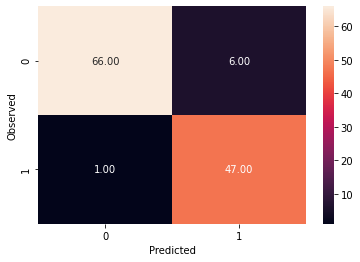

None


In [395]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(draw_cm(y_test,y_pred))

In [396]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95        72
         1.0       0.89      0.98      0.93        48

    accuracy                           0.94       120
   macro avg       0.94      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120

